 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [193]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [253]:
# Reading whale returns
whale_path = Path("./Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df = whale_df.sort_index()
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [254]:
# Count nulls
whale_df.isnull()
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [255]:
# Drop nulls
whale_df.duplicated()
whale_df.dropna(inplace=True)
whale_df.isnull()
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [251]:
#whale_df.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [252]:
#whale_df = whale_df.astype("float")
#whale_df.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [256]:
# Reading algorithmic returns
algo_path = Path("./Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [201]:
# Count nulls
algo_df.isnull()
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [202]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.isnull()
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [203]:
#algo_df = algo_df.astype("float")
#algo_df.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [204]:
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [257]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_path = Path("./Resources/sp_tsx_history.csv")
sp_tsx_history_df = pd.read_csv(sp_tsx_history_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_tsx_history_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [259]:
# Check Data Types
sp_tsx_history_df.dtypes

Close    object
dtype: object

In [260]:
# Fix Data Types
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace("$", "")
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace(",", "")
sp_tsx_history_df["Close"]

<ipython-input-260-78e9194f13dc>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace("$", "")


Date
2012-10-01    12370.19
2012-10-02    12391.23
2012-10-03    12359.47
2012-10-04    12447.68
2012-10-05    12418.99
                ...   
2019-12-20    17118.44
2019-12-23    17128.71
2019-12-24    17180.15
2019-12-27    17168.21
2019-12-30    17098.56
Name: Close, Length: 1818, dtype: object

In [261]:
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].astype("float")
sp_tsx_history_df.dtypes

Close    float64
dtype: object

In [262]:
# Calculate Daily Returns
sp_tsx_history_df = sp_tsx_history_df.pct_change()
sp_tsx_history_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [210]:
# Drop nulls
sp_tsx_history_df.dropna(inplace=True)
sp_tsx_history_df.isnull()
sp_tsx_history_df.isnull().sum()

Close    0
dtype: int64

In [211]:
# Rename `Close` Column to be specific to this portfolio.
columns = ["S&P TSX"]
sp_tsx_history_df.columns = columns
sp_tsx_history_df.head()

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [212]:
sp_tsx_history_df = sp_tsx_history_df.astype("float")
sp_tsx_history_df.dtypes

S&P TSX    float64
dtype: object

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [213]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
daily_returns_df = pd.concat([whale_df, algo_df, sp_tsx_history_df], axis="columns", join="inner")
daily_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily returns for all portfolios'}, xlabel='Date'>

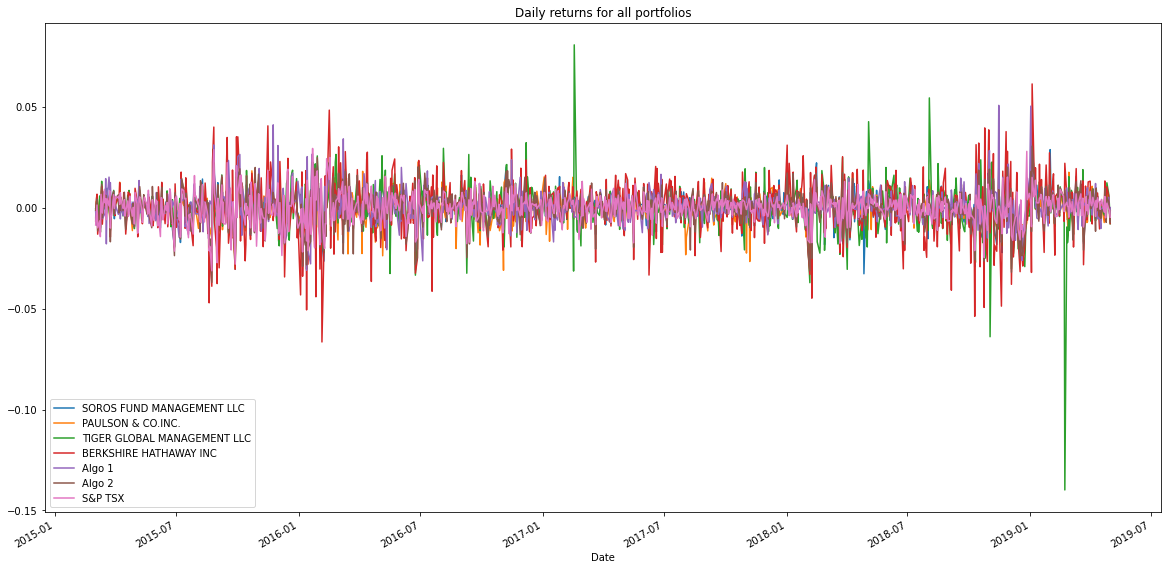

In [214]:
# Plot daily returns of all portfolios
daily_returns_df.plot(figsize = (20,10), title = 'Daily returns for all portfolios')

#### Calculate and Plot cumulative returns.

In [216]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + daily_returns_df).cumprod() - 1
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,-0.011872
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,-0.010544
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,-0.020411
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,-0.026832


<AxesSubplot:title={'center':'Cumulative returns for all funds'}, xlabel='Date'>

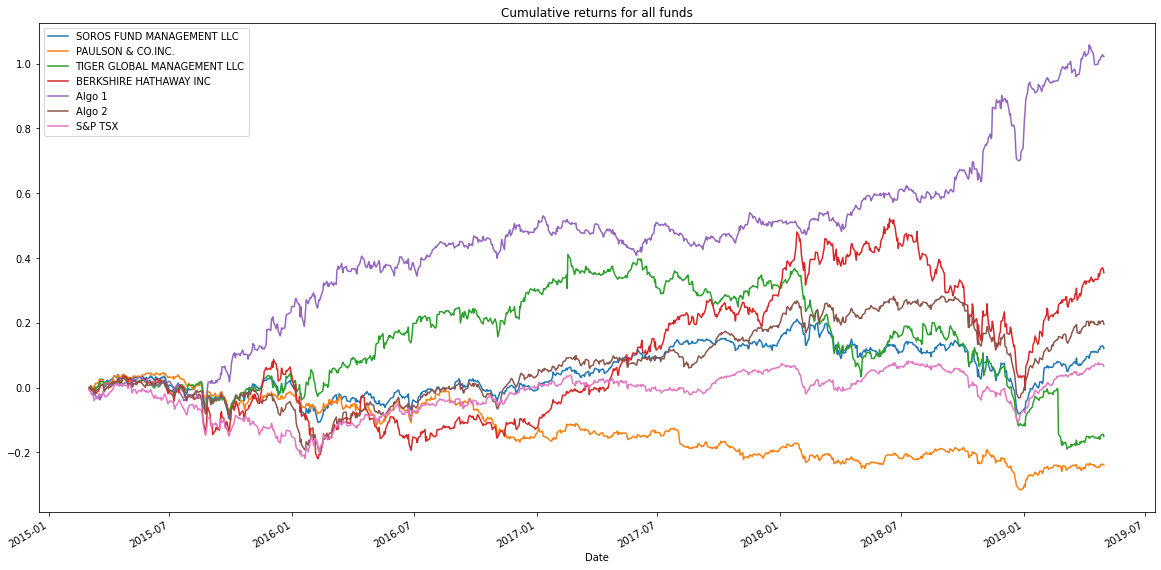

In [217]:
# Plot cumulative returns
cumulative_returns.plot(figsize = (20,10), title = 'Cumulative returns for all funds')

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P TSX 60
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Box plot'}>

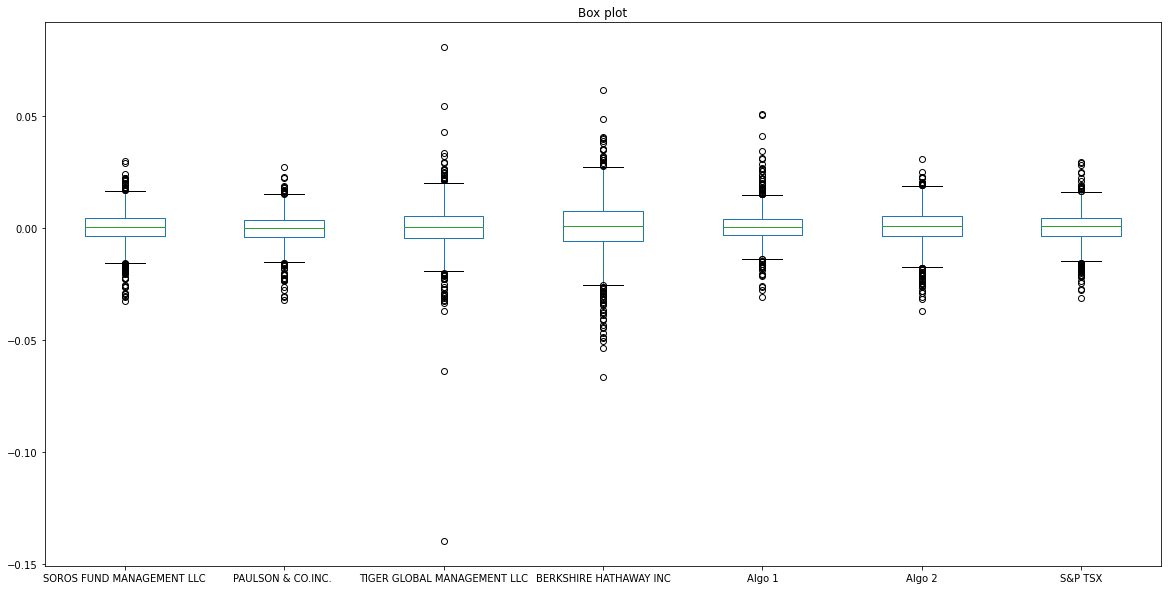

In [266]:
# Box plot to visually show risk
daily_returns_df.plot.box(figsize = (20,10), title = 'Box plot')

### Calculate Standard Deviations

In [219]:
# Calculate the daily standard deviations of all portfolios
daily_std = daily_returns_df.std()
daily_std = daily_std.sort_values(ascending=False)
daily_std

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
S&P TSX                        0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

In [267]:
#do not understand why the S&P TSX 60 standard deviation is different from above
#why can I not use the following formula
#sp_tsx_std = sp_tsx_history_df.std()
#sp_tsx_std
sp_tsx_std = sp_tsx_history_df.std()
sp_tsx_std

S&P TSX    0.006637
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [247]:
# Calculate the daily standard deviation of S&P TSX 60
sp_tsx_std = daily_std['S&P TSX']
print(f'Daily standard deviation of S&P TSX 60 is {sp_tsx_std}.')

Daily standard deviation of S&P TSX 60 is 0.007034167748577725.


In [221]:
# Determine which portfolios are riskier than the S&P TSX 60
# For a portfolio to be riskier than the S&P TSX 60, it would have a higher standard deviation
riskier_portfolios = daily_std[daily_std>sp_tsx_std]
print(f'The following portfolios are riskier than S&P TSX 60 as they have a higher standard deviation')
print(riskier_portfolios)

The following portfolios are riskier than S&P TSX 60 as they have a higher standard deviation
BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
dtype: float64


### Calculate the Annualized Standard Deviation

In [222]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std.sort_values(ascending=False)
annualized_std

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
S&P TSX                        0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60
3. Calculate and plot a 60-day Beta for Berkshire Hathaway Inc compared to the S&P 60 TSX

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling 21 day standard deviation, moving average of all portfolios'}, xlabel='Date'>

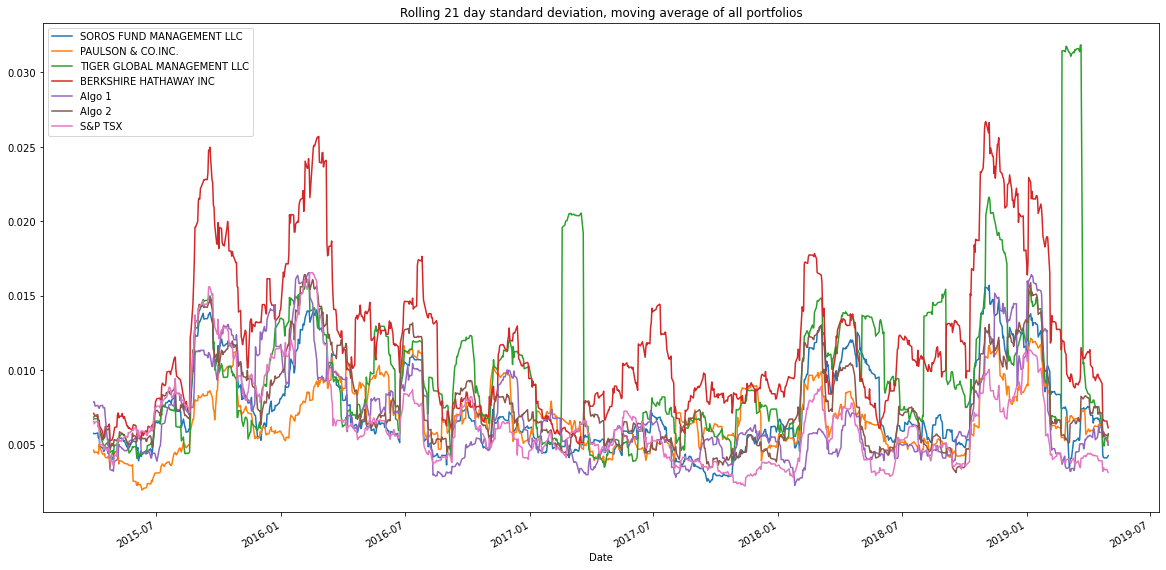

In [223]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
daily_returns_df.rolling(window=21).std()
# Plot the rolling standard deviation
daily_returns_df.rolling(window=21).std().plot(figsize = (20,10), title = 'Rolling 21 day standard deviation, moving average of all portfolios')

### Calculate and plot the correlation

<AxesSubplot:>

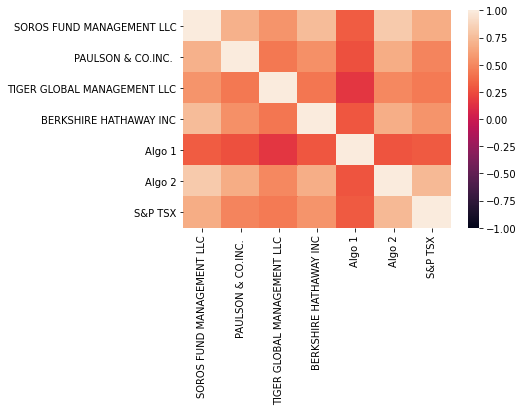

In [224]:
# Calculate the correlation
price_correlation = daily_returns_df.corr()
# Display de correlation matrix
sns.heatmap(price_correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 30 day beta of Soros vs S&P 60 TSX'}, xlabel='Date'>

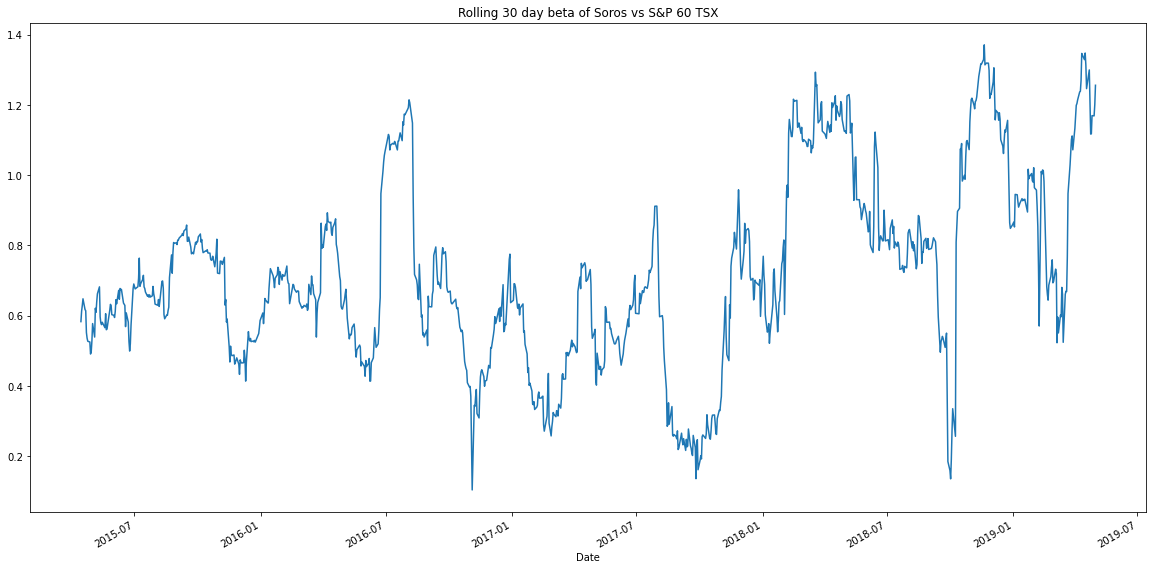

In [225]:
# Calculate covariance of a single portfolio
covariance = daily_returns_df['SOROS FUND MANAGEMENT LLC'].cov(daily_returns_df['S&P TSX'])
# Calculate variance of S&P TSX
variance = daily_returns_df['S&P TSX'].var()
# Computing beta
soros_beta = covariance/variance
# Plot beta trend
rolling_covariance = daily_returns_df['SOROS FUND MANAGEMENT LLC'].rolling(window=30).cov(daily_returns_df['S&P TSX'])
rolling_variance = daily_returns_df['S&P TSX'].rolling(window=30).var()
rolling_soros_beta = rolling_covariance / rolling_variance
rolling_soros_beta.plot(figsize = (20,10), title = 'Rolling 30 day beta of Soros vs S&P 60 TSX')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Portfolio 21 day EMA'}, xlabel='Date'>

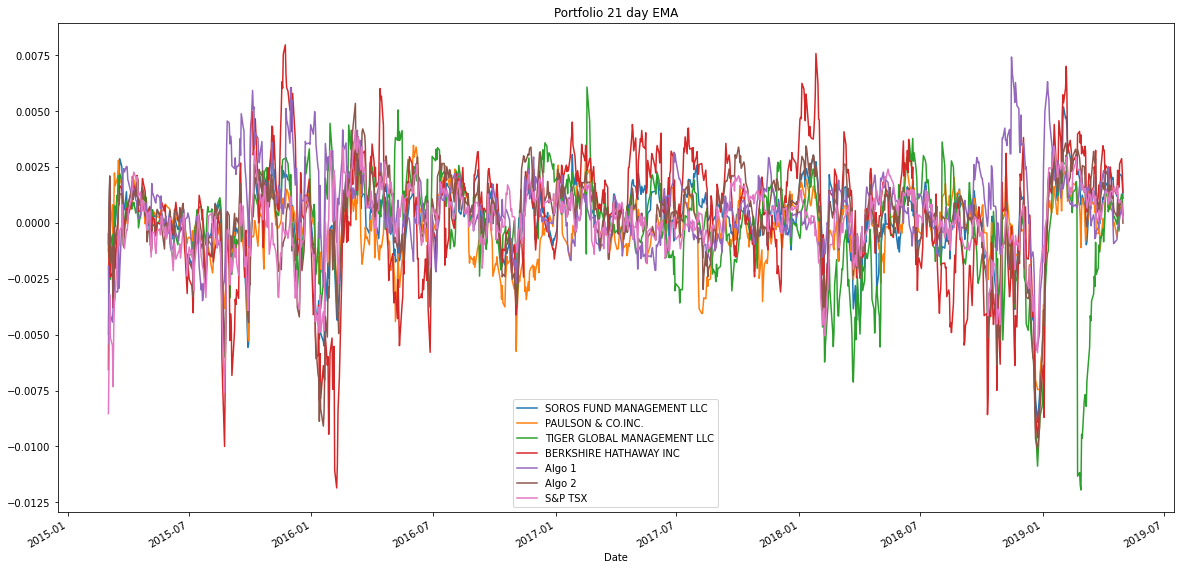

In [226]:
# Use `ewm` to calculate the rolling window
ewm_pd = pd.DataFrame(daily_returns_df).ewm(span=21).mean()
ewm_pd.plot(figsize = (20,10), title = 'Portfolio 21 day EMA')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [227]:
# Annualized Sharpe Ratios
sharpe_ratios = (daily_returns_df.mean() * 252) / (daily_returns_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

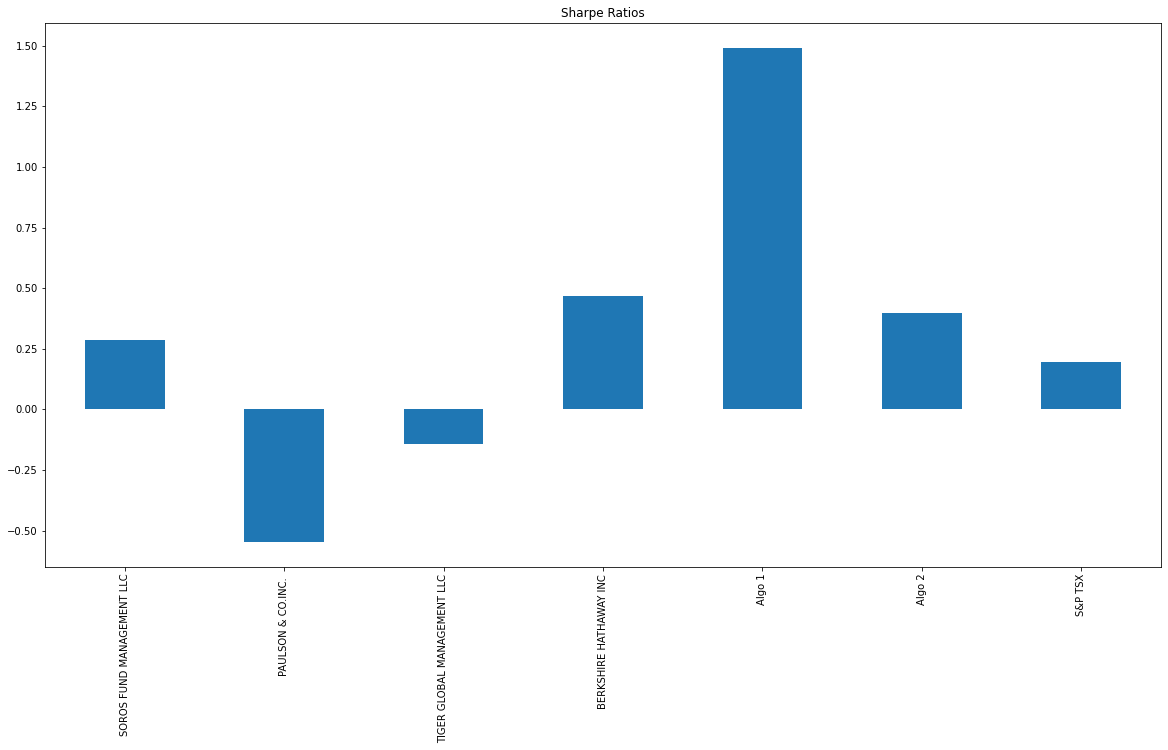

In [228]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(figsize = (20,10), kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

Sharpe ratio adjusts a portfolio's past performance or expected future performance for the excess risk taken by the investor.
In general, a high Sharpe ratio is good when compared to similar portfolios.
Weakness is that the investment returns are normally distributed (Investopedia)

In this instance, Algo 1 has the highest Sharpe ratio of all, meaning that it is the best performing after adjusting for risk.
Algo 2 is only beaten by Algo 1 and Berkshire Hathaway.
Both of them outperform the market.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [229]:
# Reading data from 1st stock
print('Data obtained from Yahoo Finance. Stocks chosen are all ASX listed. CSL, PAR, TWE')
csl_path = Path("./Resources/CSL.AX.csv")
csl_df = pd.read_csv(
    csl_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
csl_df = csl_df.sort_index(ascending=False)
csl_df = csl_df.rename(columns={
    "Close": "CSL_Close",
    })
csl_df.head()


Data obtained from Yahoo Finance. Stocks chosen are all ASX listed. CSL, PAR, TWE


,Open,High,Low,CSL_Close,Adj Close,Volume
Date,,,,,,
2021-03-12,254.199997,255.490005,252.639999,253.259995,253.259995,398008
2021-03-11,253.880005,255.000000,250.029999,253.899994,253.899994,746647
2021-03-10,255.350006,256.609985,252.210007,252.210007,252.210007,1020417
2021-03-09,245.000000,251.160004,242.000000,250.160004,250.160004,826047
2021-03-08,253.149994,253.190002,246.000000,246.000000,246.000000,771740


In [230]:
# Reading data from 2nd stock
par_path = Path("./Resources/PAR.AX.csv")
par_df = pd.read_csv(
    par_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
par_df = par_df.sort_index(ascending=False)
par_df = par_df.rename(columns={
    "Close": "PAR_Close",
    })
par_df.head()

,Open,High,Low,PAR_Close,Adj Close,Volume
Date,,,,,,
2021-03-12,2.35,2.495,2.340,2.46,2.46,477504
2021-03-11,2.35,2.380,2.300,2.32,2.32,230560
2021-03-10,2.32,2.390,2.320,2.35,2.35,350546
2021-03-09,2.25,2.330,2.220,2.26,2.26,421641
2021-03-08,2.32,2.340,2.245,2.25,2.25,332607


In [231]:
# Reading data from 3rd stock
twe_path = Path("./Resources/TWE.AX.csv")
twe_df = pd.read_csv(
    twe_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
twe_df = twe_df.sort_index(ascending=False)
twe_df = twe_df.rename(columns={
    "Close": "TWE_Close",
    })
twe_df.head()

,Open,High,Low,TWE_Close,Adj Close,Volume
Date,,,,,,
2021-03-12,11.36,11.39,11.090,11.18,11.18,4079539
2021-03-11,11.60,11.63,11.390,11.50,11.50,4310134
2021-03-10,11.12,11.58,11.115,11.42,11.42,5868157
2021-03-09,10.99,11.14,10.870,11.10,11.10,5547204
2021-03-08,11.15,11.29,10.750,10.97,10.97,9369216


In [232]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([csl_df, par_df, twe_df], axis="columns", join="inner")
combined_df = combined_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
combined_df.head()

,CSL_Close,PAR_Close,TWE_Close
Date,,,
2021-03-12,253.259995,2.46,11.18
2021-03-11,253.899994,2.32,11.50
2021-03-10,252.210007,2.35,11.42
2021-03-09,250.160004,2.26,11.10
2021-03-08,246.000000,2.25,10.97


In [233]:
# Reset Date index
print('Already done when importing CSV')

Already done when importing CSV


In [234]:
# Reorganize portfolio data by having a column per symbol
combined_df = combined_df.rename(columns={
    "CSL_Close": "CSL",
    "PAR_Close": "PAR",
    "TWE_Close": "TWE"
})
combined_df.head()

,CSL,PAR,TWE
Date,,,
2021-03-12,253.259995,2.46,11.18
2021-03-11,253.899994,2.32,11.50
2021-03-10,252.210007,2.35,11.42
2021-03-09,250.160004,2.26,11.10
2021-03-08,246.000000,2.25,10.97


In [235]:
# Calculate daily returns
combined_df = combined_df.pct_change()
combined_df.head()
# Drop NAs
combined_df.dropna(inplace=True)
combined_df.isnull()
combined_df.isnull().sum()
# Display sample data
combined_df.head()

,CSL,PAR,TWE
Date,,,
2021-03-11,0.002527,-0.056911,0.028623
2021-03-10,-0.006656,0.012931,-0.006957
2021-03-09,-0.008128,-0.038298,-0.028021
2021-03-08,-0.016629,-0.004425,-0.011712
2021-03-05,0.010488,0.008889,-0.060164


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [236]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
returns_df = combined_df.dot(weights)

# Display sample data
returns_df = returns_df.to_frame()
returns_df = returns_df.rename(columns = {0 : "My_Portfolio"})
returns_df.head()

,My_Portfolio
Date,
2021-03-11,-0.008587
2021-03-10,-0.000227
2021-03-09,-0.024816
2021-03-08,-0.010922
2021-03-05,-0.013596


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [237]:
# Join your returns DataFrame to the original returns DataFrame
join_df = pd.concat([returns_df, daily_returns_df], axis="columns", join="inner")
join_df.head()

,My_Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,,
2019-05-01,-0.012690,-0.005847,-0.001341,-0.007936,-0.007833,0.000094,-0.007358,-0.004703
2019-04-30,-0.002497,-0.001295,-0.002211,-0.000259,-0.003702,-0.002944,-0.001570,-0.001183
2019-04-29,0.010823,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788
2019-04-26,0.006672,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-24,-0.003952,0.002284,0.001009,-0.004000,-0.006386,0.001095,0.000399,-0.004972


In [238]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
join_df.dropna(inplace=True)
join_df.isnull()
join_df.isnull().sum()

My_Portfolio                   0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P TSX                        0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [239]:
# Calculate the annualized `std`
daily2_std = join_df.std()
daily2_std = daily2_std.sort_values(ascending=False)
daily2_std

My_Portfolio                   0.021376
BERKSHIRE HATHAWAY INC         0.013403
TIGER GLOBAL MANAGEMENT LLC    0.011374
Algo 2                         0.008537
SOROS FUND MANAGEMENT LLC      0.008032
Algo 1                         0.007759
PAULSON & CO.INC.              0.007275
S&P TSX                        0.007108
dtype: float64

In [240]:
annualized2_std = daily2_std * np.sqrt(252)
annualized2_std.sort_values(ascending=False)
annualized2_std

My_Portfolio                   0.339332
BERKSHIRE HATHAWAY INC         0.212766
TIGER GLOBAL MANAGEMENT LLC    0.180549
Algo 2                         0.135526
SOROS FUND MANAGEMENT LLC      0.127510
Algo 1                         0.123168
PAULSON & CO.INC.              0.115485
S&P TSX                        0.112837
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling 21 day standard deviation, moving average of all portfolios'}, xlabel='Date'>

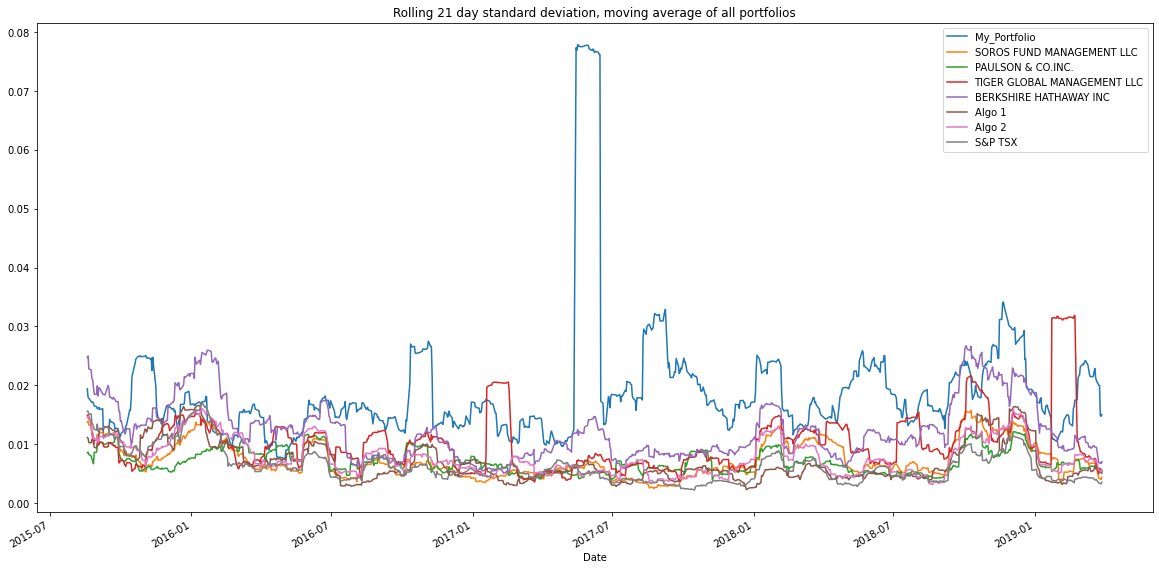

In [241]:
# Calculate rolling standard deviation
join_df.rolling(window=21).std()
# Plot the rolling standard deviation
join_df.rolling(window=21).std().plot(figsize = (20,10), title = 'Rolling 21 day standard deviation, moving average of all portfolios')

### Calculate and plot the correlation

<AxesSubplot:>

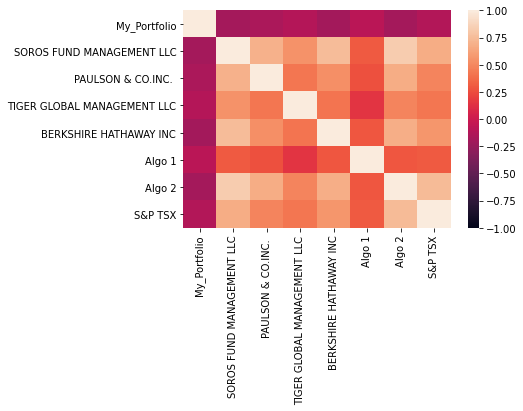

In [242]:
# Calculate and plot the correlation
price_correlation_2 = join_df.corr()
# Display de correlation matrix
sns.heatmap(price_correlation_2, vmin=-1, vmax=1)

### Calculate and Plot Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 30 day beta of My Portfolio vs S&P 60 TSX'}, xlabel='Date'>

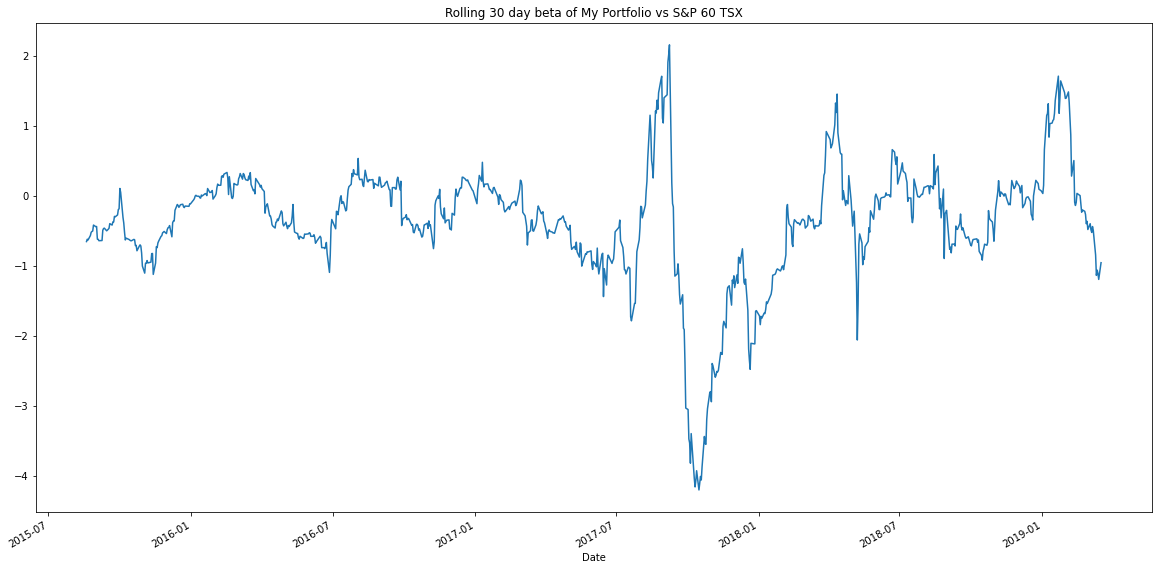

In [243]:
# Calculate and plot Beta
covariance2 = join_df['My_Portfolio'].cov(join_df['S&P TSX'])
# Calculate variance of S&P TSX
variance2 = join_df['S&P TSX'].var()
# Computing beta
my_portfolio_beta = covariance2/variance2
# Plot beta trend
rolling_covariance_2 = join_df['My_Portfolio'].rolling(window=30).cov(join_df['S&P TSX'])
rolling_variance_2 = join_df['S&P TSX'].rolling(window=30).var()
rolling_my_beta = rolling_covariance_2 / rolling_variance_2
rolling_my_beta.plot(figsize = (20,10), title = 'Rolling 30 day beta of My Portfolio vs S&P 60 TSX')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [244]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios_2 = (join_df.mean() * 252) / (join_df.std() * np.sqrt(252))
sharpe_ratios_2

My_Portfolio                  -0.576623
SOROS FUND MANAGEMENT LLC      0.282488
PAULSON & CO.INC.             -0.527051
TIGER GLOBAL MANAGEMENT LLC   -0.231295
BERKSHIRE HATHAWAY INC         0.557583
Algo 1                         1.716610
Algo 2                         0.493572
S&P TSX                        0.378065
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

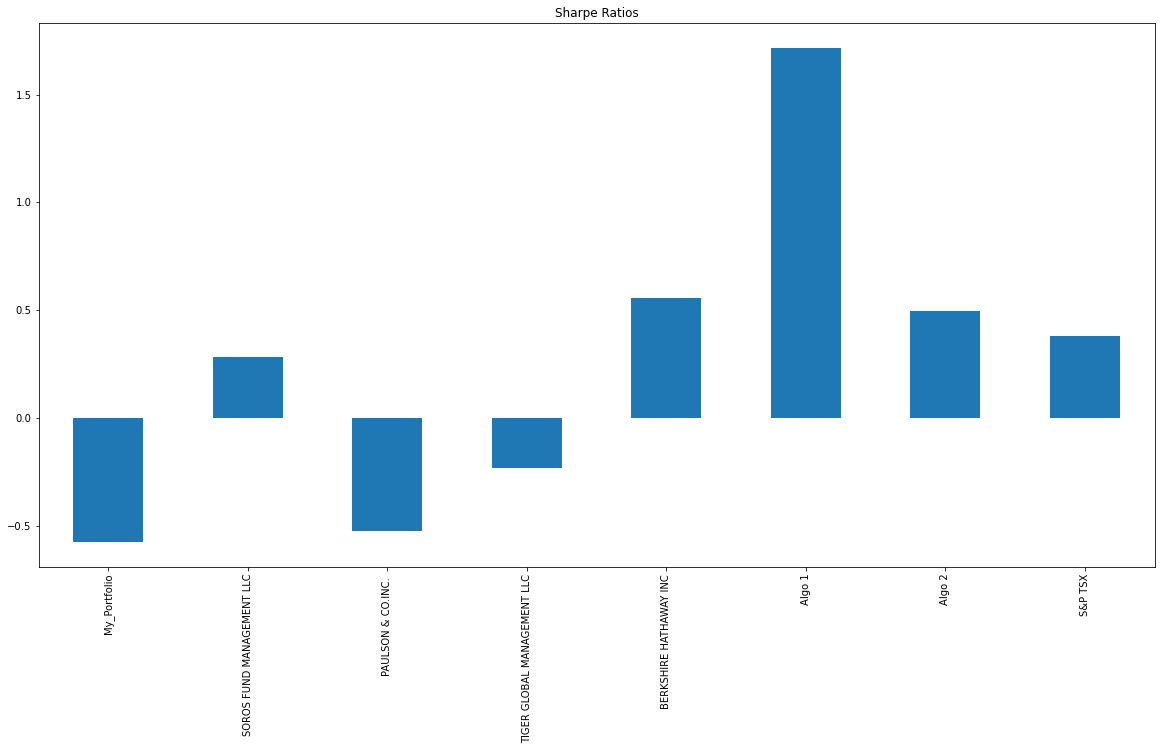

In [245]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_2.plot(figsize = (20,10), kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [246]:
print('From Investopedia, Sharpe ratio adjusts past performance or expected future performance for the excess risk taken by the investor. In general, a high Sharpe ratio is good when compared to similar portfolios. Weakness is that the investment returns are normally distributed. In this instance, my portfolio has the lowest Sharpe ratio of all, meaning that it is the worst performing after adjusting for risk.')

From Investopedia, Sharpe ratio adjusts past performance or expected future performance for the excess risk taken by the investor. In general, a high Sharpe ratio is good when compared to similar portfolios. Weakness is that the investment returns are normally distributed. In this instance, my portfolio has the lowest Sharpe ratio of all, meaning that it is the worst performing after adjusting for risk.
